In [44]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import copy
import itertools

import chess
import aichess


In [45]:
TA = np.zeros((8, 8))

# white pieces
TA[7][5] = 6        # white king
TA[7][0] = 2        # white rook

# black pieces
TA[0][5] = 12       # black king
TA[0][0] = 8        # black rook

# initialize board
chess = chess.Chess(TA)
chess.board.print_board()


[0] *********************************
8 0 | R |   |   |   |   | K |   |   |
7 1 |   |   |   |   |   |   |   |   |
6 2 |   |   |   |   |   |   |   |   |
5 3 |   |   |   |   |   |   |   |   |
4 4 |   |   |   |   |   |   |   |   |
3 5 |   |   |   |   |   |   |   |   |
2 6 |   |   |   |   |   |   |   |   |
1 7 | R |   |   |   |   | K |   |   |
    *********************************
      0   1   2   3   4   5   6   7   [1]
      A   B   C   D   E   F   G   H


In [46]:
WhitePlayerAichess = aichess.Aichess(TA, True, True)
BlackPlayerAichess = aichess.Aichess(TA, False, True)


1. Whites	start	moving.	Implement	the	dynamics	of	a	game in	which	both,	whites	and	blacks,	
follow	the	same	Minimax	algorithm	to	try	to	check-mate	each	other. Assume	that	both	
implement	minimax	with	a	depth	of	4	moves	(2p)

> 1. Once	implemented,	run	the	same	game	20	times.	How	many	times	do	whites	win?	

In [47]:
WhitePlayerMinimax = copy.deepcopy(WhitePlayerAichess)
BlackPlayerMinimax = copy.deepcopy(BlackPlayerAichess)

winnerTable ={'White' : 10,
              'Black' : 10}

for game in tqdm(range(20)):

    while True:

        # ----------------White Player -------------------------------- #
        WhitePlayerCurrentState = chess.board.currentStateW
        WhitePlayerMinimax.chess.boardSim = chess.board
        WhitePlayerMinimax.currentStateW = chess.board.currentStateW
        WhitePlayerMinimax.currentStateB = chess.board.currentStateB
        WhitePlayerNextState = WhitePlayerMinimax.Minimax(2)
        chess.movePiece(chess, WhitePlayerCurrentState, WhitePlayerNextState)

        if chess.GameOver(chess.board.board):
            winnerTable['White'] += winnerTable['White'] + 1
            break
        
            
        # ----------------Black Player -------------------------------- #
        BlackPlayerCurrentState = chess.board.currentStateB
        BlackPlayerMinimax.chess.boardSim = chess.board
        BlackPlayerMinimax.currentStateW = chess.board.currentStateW
        BlackPlayerMinimax.currentStateB = chess.board.currentStateB
        BlackPlayerNextState = BlackPlayerMinimax.Minimax(2)
        chess.movePiece(chess, BlackPlayerCurrentState, BlackPlayerNextState)

        if chess.GameOver(chess.board.board):
            winnerTable['Black'] += winnerTable['Black'] + 1 
            break


100%|██████████| 20/20 [00:00<00:00, 15987.44it/s]


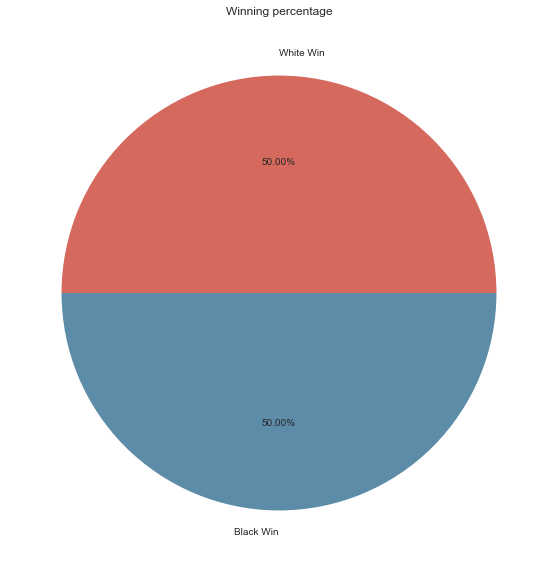

In [65]:

winnerPercent = np.array([winnerTable['White'], winnerTable['Black']])

plt.figure(figsize=(10,10))
plt.style.use('seaborn-ticks')
plt.pie(winnerPercent,
        labels=['White Win','Black Win'], 
        colors=["#d5695d", "#5d8ca8"], 
        autopct='%.2f%%', 
       )
plt.title("Winning percentage")
plt.show()

2. Now	run	the	same	simulations,	but	varying	the	depth	of	the	minimax	algorithm	from	1	to	
5	moves both	for	whites	and	blacks.	Run	each	possible	combination	of	depths	10	times	
(2p)

> a. Plot	the	percentage	of	white	wins	over	the	total	for	each	depth	value

In [59]:
WhitePlayerMinimax = copy.deepcopy(WhitePlayerAichess)
BlackPlayerMinimax = copy.deepcopy(BlackPlayerAichess)


winnerTable = dict()

ite = itertools.product(range(1,6), repeat=2)

#print(list(ite))


for depthW, depthB in tqdm(list(ite)):
    print(f"{depthW}:{depthB}")
    for game in tqdm(range(10)):
        pass

  0%|          | 0/25 [00:00<?, ?it/s]

1:1


100%|██████████| 10/10 [00:00<?, ?it/s]


1:2


100%|██████████| 10/10 [00:00<?, ?it/s]


1:3


100%|██████████| 10/10 [00:00<?, ?it/s]


1:4


100%|██████████| 10/10 [00:00<?, ?it/s]


1:5


100%|██████████| 10/10 [00:00<?, ?it/s]


2:1


100%|██████████| 10/10 [00:00<?, ?it/s]


2:2


100%|██████████| 10/10 [00:00<?, ?it/s]


2:3


100%|██████████| 10/10 [00:00<?, ?it/s]


2:4


100%|██████████| 10/10 [00:00<?, ?it/s]


2:5


100%|██████████| 10/10 [00:00<00:00, 16933.00it/s]


3:1


100%|██████████| 10/10 [00:00<?, ?it/s]


3:2


100%|██████████| 10/10 [00:00<?, ?it/s]


3:3


100%|██████████| 10/10 [00:00<?, ?it/s]


3:4


100%|██████████| 10/10 [00:00<?, ?it/s]


3:5


100%|██████████| 10/10 [00:00<?, ?it/s]


4:1


100%|██████████| 10/10 [00:00<?, ?it/s]


4:2


 68%|██████▊   | 17/25 [00:00<00:00, 160.54it/s]

4:3


100%|██████████| 10/10 [00:00<?, ?it/s]


4:4


100%|██████████| 10/10 [00:00<?, ?it/s]


4:5


100%|██████████| 10/10 [00:00<?, ?it/s]


5:1


100%|██████████| 10/10 [00:00<00:00, 9993.58it/s]


5:2


100%|██████████| 10/10 [00:00<?, ?it/s]


5:3


100%|██████████| 10/10 [00:00<?, ?it/s]


5:4


100%|██████████| 10/10 [00:00<?, ?it/s]


5:5


100%|██████████| 25/25 [00:00<00:00, 143.03it/s]


In [60]:

# winnerPercent = np.array([winnerTable['White'], winnerTable['Black']])

# plt.style.use('seaborn-ticks')
# plt.pie(winnerPercent,
#         labels=['White Win','Black Win'], # 设置饼图标签
#         colors=["#d5695d", "#5d8ca8"], # 设置饼图颜色
#         autopct='%.2f%%', # 格式化输出百分比
#        )
# plt.title("Winning percentage") # 设置标题
# plt.figure(figsize=(30,30))
# plt.show()

3. Implement	the	alfa-beta	pruning	for	the	blacks	only, whites	still	play	with	minimax	(2p)

> a. Using	an	equal	depth	of	4,	run	10	simulations.	Who	wins	the	most?

In [61]:
WhitePlayerAlphaBeta = copy.deepcopy(WhitePlayerAichess)
BlackPlayerMinimax = copy.deepcopy(BlackPlayerAichess)


winnerTable ={'White' : 5,
              'Black' : 5}

for game in tqdm(range(10)):
    pass

100%|██████████| 10/10 [00:00<00:00, 25954.85it/s]


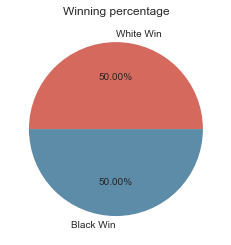

<Figure size 2160x2160 with 0 Axes>

In [62]:
winnerPercent = np.array([winnerTable['White'], winnerTable['Black']])

plt.style.use('seaborn-ticks')
plt.pie(winnerPercent,
        labels=['White Win','Black Win'], # 设置饼图标签
        colors=["#d5695d", "#5d8ca8"], # 设置饼图颜色
        autopct='%.2f%%', # 格式化输出百分比
       )
plt.title("Winning percentage") # 设置标题
plt.figure(figsize=(30,30))
plt.show()

4. Both	whites	and	blacks	use	the	same	alfa-beta	pruning.	Run	ten	simulations	each	while	
varying	the	depth	with	which	each	team	plays	(1-5)	(2p)

> a. Plot	the	proportion	of	wins	for	whites	a

In [ ]:
WhitePlayerAlphaBeta = copy.deepcopy(WhitePlayerAichess)
BlackPlayerAlphaBeta = copy.deepcopy(BlackPlayerAichess)


winnerTable = dict()

ite = itertools.product(range(1,6), repeat=2)

#print(list(ite))


for depthW, depthB in tqdm(list(ite)):
    print(f"{depthW}:{depthB}")
    for game in tqdm(range(10)):
        pass

In [ ]:
# winnerPercent = np.array([winnerTable['White'], winnerTable['Black']])

# plt.style.use('seaborn-ticks')
# plt.pie(winnerPercent,
#         labels=['White Win','Black Win'], # 设置饼图标签
#         colors=["#d5695d", "#5d8ca8"], # 设置饼图颜色
#         autopct='%.2f%%', # 格式化输出百分比
#        )
# plt.title("Winning percentage") # 设置标题
# plt.figure(figsize=(30,30))
# plt.show()

5. Implement	the	expectimax	algorithm	for	whites	and	blacks. (2p)

> a. Whites	play	expectimax,	blacks	alfa-beta	pruning

> > i. Run	10	simulations	each	and	plot	the	proportion	of	wins	for	whites/blacks

> b. Now	whites	play	alfa-beta	pruning,	blacks	expectimax.

> > i. Run	 again	 10	 simulations	 each	 and	 plot	 the	 proportion	 of	 wins	 for	
whites/blacks.